In [ ]:
import sys, os
import pandas as pd
import talib

In [2]:
# Load stock data
stock_data = pd.read_csv("C:/Users/USER/Desktop/KAIM/Kaim-week-1/Data/merged_output.csv")
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

In [24]:

sys.path.append("../scripts") 
from data_loader import load_stock_data
merged_df = pd.read_csv("C:/Users/USER/Desktop/KAIM/Kaim-week-1/Data/merged_output.csv", header=0)
from eda import check_missing_values, handle_missing_values, detect_outliers, remove_outliers

from technical_indicators import calculate_close_indicators,calculate_high_indicators, calculate_low_indicators,calculate_open_indicators,calculate_volume_indicators,calculate_all_indicators
from visualizations_for_task2 import plot_column_with_indicators, plot_rsi

In [27]:
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [28]:
# Check for missing values
print("Missing Values:")
print(check_missing_values(merged_df))

Missing Values:
Series([], dtype: int64)


In [12]:
# Handle missing values
df_cleaned = handle_missing_values(stock_data, strategy="fill", fill_value={"headline": "Unknown"})

In [29]:
# Check for duplicate rows
duplicates = merged_df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [30]:

#Check Column Data Types
merged_df.dtypes


Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [31]:
merged_df.info

<bound method DataFrame.info of              Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.098943   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093781   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086898   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089049   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091630   
...           ...         ...         ...         ...         ...         ...   
45423  2024-07-24  225.419998  225.990005  214.710007  215.990005  215.990005   
45424  2024-07-25  216.800003  226.000000  216.229996  220.250000  220.250000   
45425  2024-07-26  221.190002  222.279999  215.330002  219.800003  219.800003   
45426  2024-07-29  224.899994  234.270004  224.699997  232.100006  232.100006   
45427  2024-07-30  232.250000  232.410004  220.000000  222.619995  222.619995

In [32]:
merged_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [34]:
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
missing_columns = [col for col in required_columns if col not in merged_df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")

In [ ]:
#Check for logical consistency:

#Open ≤ High
#Low ≤ Close

In [40]:
# Validate consistency
inconsistent_rows = merged_df[(merged_df['Open'] > merged_df['High']) | (merged_df['Low'] > merged_df['Close'])]
print("Inconsistent rows:\n", inconsistent_rows)


Inconsistent rows:
 Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Dividends, Stock Splits]
Index: []


In [41]:
#Sort the data by date to ensure proper sequencing.
merged_df= merged_df.sort_values(by='Date')


In [42]:
merged_df.head

<bound method NDFrame.head of              Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.098943   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093781   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086898   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089049   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091630   
...           ...         ...         ...         ...         ...         ...   
41882  2024-07-30  111.519997  111.989998  102.540001  103.730003  103.730003   
22863  2024-07-30  171.830002  172.949997  170.119995  171.860001  171.860001   
25789  2024-07-30  467.000000  472.730011  456.700012  463.190002  463.190002   
35461  2024-07-30  427.720001  429.049988  417.359985  422.920013  422.159119   
45427  2024-07-30  232.250000  232.410004  220.000000  222.619995  222.619995  

In [ ]:
#Add Derived Features (Optional)
#Enhance the dataset with additional metrics:

#Daily return: (Close - Open) / Open
#Price range: High - Low

In [45]:
# Add daily return
merged_df['Daily Return'] = (merged_df['Close'] - merged_df['Open']) / merged_df['Open']

# Add price range
merged_df['Price Range'] = merged_df['High'] - merged_df['Low']


In [46]:
merged_df['Daily Return']

0        0.000000
1       -0.004566
2       -0.004926
3        0.000000
4        0.000000
           ...   
41882   -0.069853
22863    0.000175
25789   -0.008158
35461   -0.011222
45427   -0.041464
Name: Daily Return, Length: 45428, dtype: float64

In [47]:
merged_df['Price Range']

0         0.000558
1         0.000558
2         0.000558
3         0.000558
4         0.000558
           ...    
41882     9.449997
22863     2.830002
25789    16.029999
35461    11.690002
45427    12.410004
Name: Price Range, Length: 45428, dtype: float64

In [49]:
#Save the cleaned data for further analysis.
# Save to a new CSV
merged_df.to_csv("cleaned_stock_data.csv", index=False)

In [5]:
#calculate indicators

In [23]:
# Add technical indicators for multiple columns
stock_data = calculate_all_indicators(merged_df)


In [20]:
# Print Close indicators
print(stock_data[['SMA_Close_50', 'EMA_Close_50', 'RSI_Close', 'MACD_Close', 'MACD_Signal_Close', 'MACD_Hist_Close']])

       SMA_Close_50  EMA_Close_50  RSI_Close  MACD_Close  MACD_Signal_Close  \
0               NaN           NaN        NaN         NaN                NaN   
1               NaN           NaN        NaN         NaN                NaN   
2               NaN           NaN        NaN         NaN                NaN   
3               NaN           NaN        NaN         NaN                NaN   
4               NaN           NaN        NaN         NaN                NaN   
...             ...           ...        ...         ...                ...   
45423      202.1838    212.323676  44.886918   11.789291          15.873789   
45424      203.1510    212.634512  46.951389    9.353206          14.569672   
45425      203.9960    212.915512  46.752165    7.302106          13.116159   
45426      205.1582    213.667845  52.664511    6.593101          11.811547   
45427      206.1138    214.018909  48.220474    5.206237          10.490485   

       MACD_Hist_Close  
0                  NaN  
1

In [28]:
stock_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_Close_50,...,SMA_High_50,EMA_High_50,RSI_High,SMA_Low_50,EMA_Low_50,RSI_Low,SMA_Open_50,EMA_Open_50,RSI_Open,SMA_Volume_50
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097223,48630400,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.101954,37363200,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106257,46950400,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.111849,48003200,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.122173,55574400,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#VISUALIZATIONS

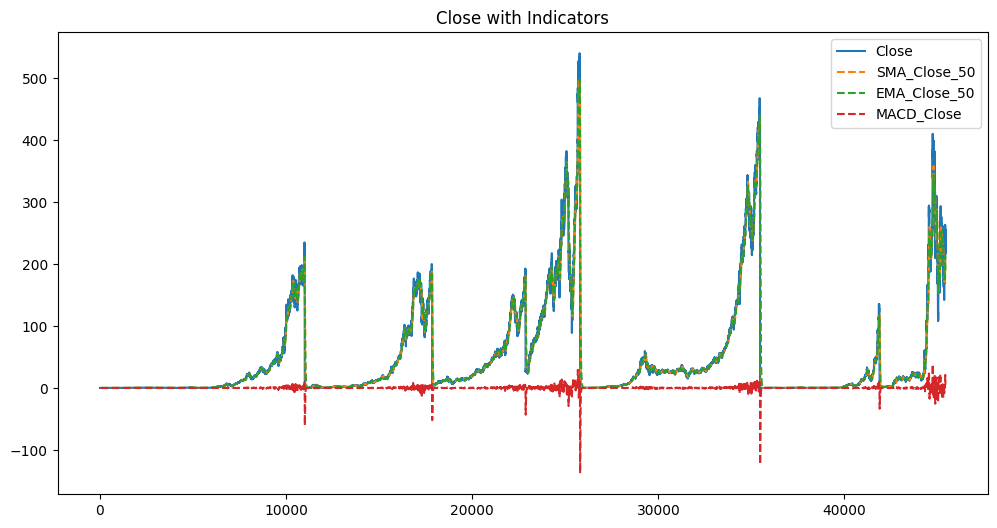

In [25]:
# List of indicators for the Close price
indicators = ['SMA_Close_50', 'EMA_Close_50', 'MACD_Close']

# Plot Close price with the indicators
plot_column_with_indicators(stock_data, 'Close', indicators)


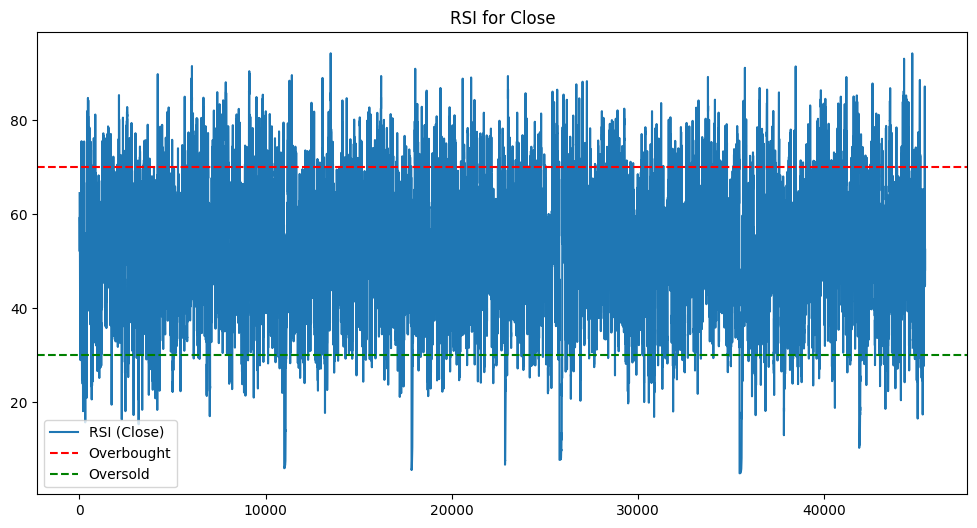

In [26]:
# Plot RSI for Close price
plot_rsi(stock_data, 'Close')

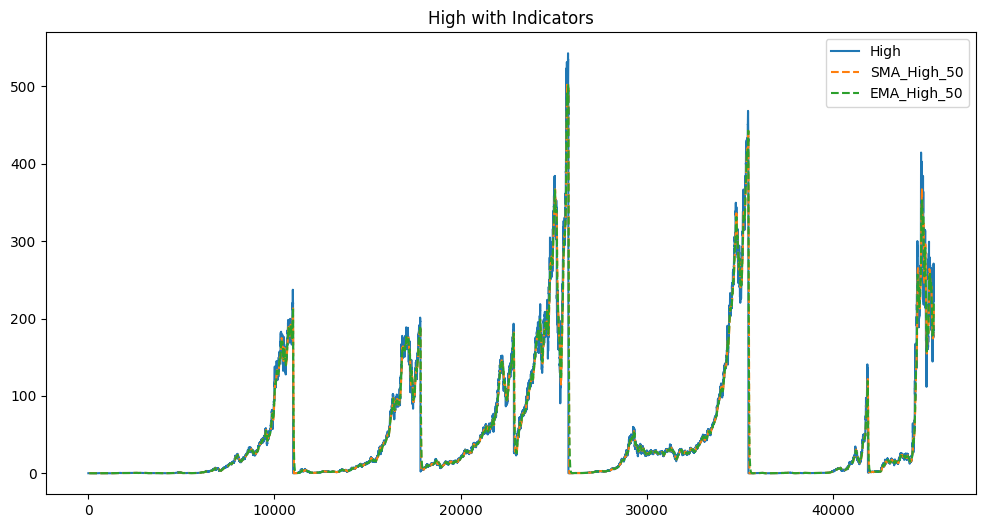

In [29]:
# List of indicators for the High price
indicators = ['SMA_High_50', 'EMA_High_50']

# Plot High price with the indicators
plot_column_with_indicators(stock_data, 'High', indicators)

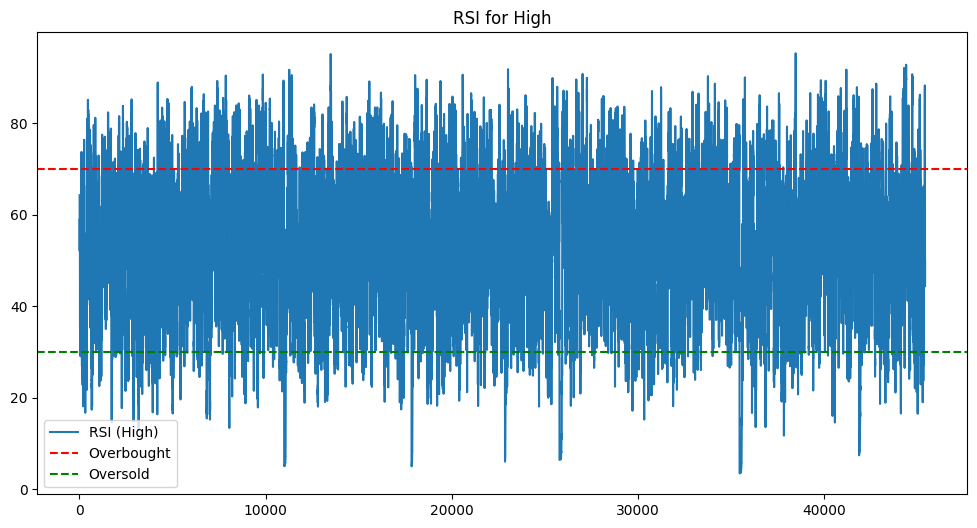

In [30]:
# Plot RSI for High price
plot_rsi(stock_data, 'High')